<a href="https://colab.research.google.com/github/vishnuvryeruva/Kmeans-pytorch----AGG-single-link-cluster/blob/main/Kmeans_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K MEANS**

In [1]:
!!pip install kmeans_pytorch

['Requirement already satisfied: kmeans_pytorch in /usr/local/lib/python3.7/dist-packages (0.3)']

In [2]:
import torch
import numpy as np
from kmeans_pytorch import kmeans_predict, kmeans as kms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dat = pd.read_csv('/content/drive/MyDrive/Data/data-final.csv', sep='\t')
data = dat.copy()
pd.options.display.max_columns = 100
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [4]:
data = data.dropna()

In [5]:
data.isna().sum()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
country    0
dtype: int64

In [6]:
data = data.drop_duplicates()

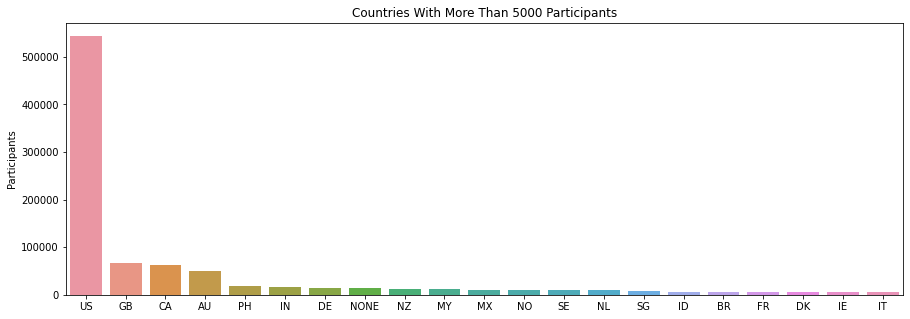

In [7]:
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [8]:
df = data.drop('country', axis=1)

In [9]:
df.dtypes

EXT1     float64
EXT2     float64
EXT3     float64
EXT4     float64
EXT5     float64
EXT6     float64
EXT7     float64
EXT8     float64
EXT9     float64
EXT10    float64
EST1     float64
EST2     float64
EST3     float64
EST4     float64
EST5     float64
EST6     float64
EST7     float64
EST8     float64
EST9     float64
EST10    float64
AGR1     float64
AGR2     float64
AGR3     float64
AGR4     float64
AGR5     float64
AGR6     float64
AGR7     float64
AGR8     float64
AGR9     float64
AGR10    float64
CSN1     float64
CSN2     float64
CSN3     float64
CSN4     float64
CSN5     float64
CSN6     float64
CSN7     float64
CSN8     float64
CSN9     float64
CSN10    float64
OPN1     float64
OPN2     float64
OPN3     float64
OPN4     float64
OPN5     float64
OPN6     float64
OPN7     float64
OPN8     float64
OPN9     float64
OPN10    float64
dtype: object

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

In [11]:
pca_2 = PCA(n_components = 5)
data_embed = pca_2.fit_transform(X_scaled)

Using SKLearn

In [12]:
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

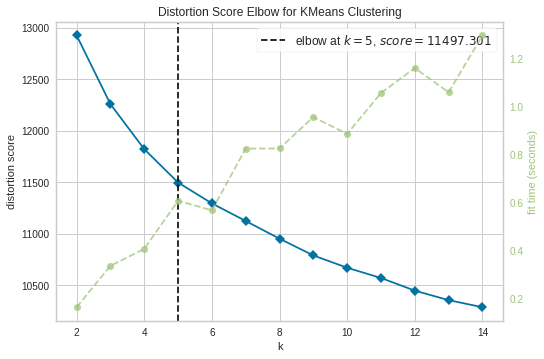

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [14]:
km = KMeans(n_clusters=3).fit(df)
km.labels_

array([1, 0, 1, ..., 2, 0, 2], dtype=int32)

In [15]:
y_kmeans = km.fit_predict(df)

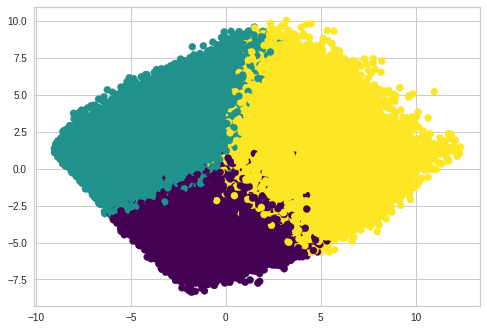

In [16]:
plt.scatter(data_embed[:, 0], data_embed[:, 1], c=y_kmeans, s=50, cmap='viridis')

Using PyTorch

In [43]:
data_size, dims, num_clusters = 10000, 2, 3
x = torch.from_numpy(df.to_numpy()) 

In [18]:
cluster_ids_x, cluster_centers = kms(X=x,num_clusters=num_clusters,distance='euclidean',
device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

running k-means on cuda..


[running kmeans]: 18it [00:19,  1.09s/it, center_shift=0.000096, iteration=18, tol=0.000100]


In [19]:
cluster_ids_x

tensor([1, 2, 2,  ..., 1, 2, 1])

In [20]:
num_clusters

3

In [21]:
cluster_centers

tensor([[0.4802, 0.5908, 0.5625, 0.7038, 0.5978, 0.5222, 0.4840, 0.7242, 0.5487,
         0.8036, 0.8436, 0.5066, 0.9000, 0.4372, 0.7088, 0.7716, 0.8084, 0.7578,
         0.7927, 0.7509, 0.4529, 0.7566, 0.5124, 0.8150, 0.4479, 0.8018, 0.4591,
         0.7384, 0.7944, 0.6825, 0.5859, 0.6766, 0.7767, 0.6718, 0.4455, 0.6872,
         0.7171, 0.5834, 0.5877, 0.6846, 0.7202, 0.4574, 0.8328, 0.4118, 0.7291,
         0.3878, 0.7572, 0.6511, 0.8593, 0.7848],
        [0.6891, 0.3899, 0.8384, 0.4624, 0.8389, 0.3443, 0.7589, 0.5653, 0.7402,
         0.5336, 0.5555, 0.7122, 0.7022, 0.6015, 0.4896, 0.4657, 0.5168, 0.4275,
         0.5121, 0.4173, 0.3915, 0.8769, 0.4067, 0.8450, 0.3782, 0.7782, 0.3310,
         0.8083, 0.8210, 0.8197, 0.7078, 0.5625, 0.8197, 0.4425, 0.5847, 0.5130,
         0.7553, 0.4305, 0.6891, 0.7551, 0.7642, 0.3736, 0.8209, 0.3720, 0.8180,
         0.3395, 0.8412, 0.6493, 0.8216, 0.8485],
        [0.3895, 0.7237, 0.5466, 0.7525, 0.4964, 0.6050, 0.3825, 0.7882, 0.4626,
         

In [22]:
clus_data = df
clus_data['clusters'] = cluster_ids_x

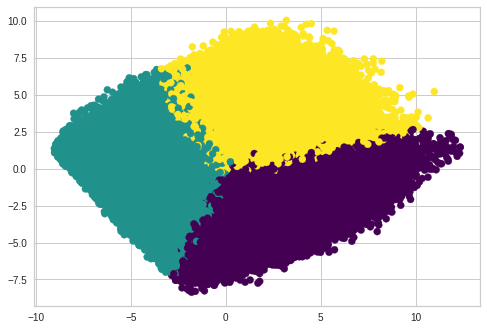

In [23]:
plt.scatter(data_embed[:, 0], data_embed[:, 1], c=cluster_ids_x, s=50, cmap='viridis')

**AGGLOMERATIVE**

In [38]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [55]:
df = df.head(100000)

In [56]:
x = torch.from_numpy(df.to_numpy()) 

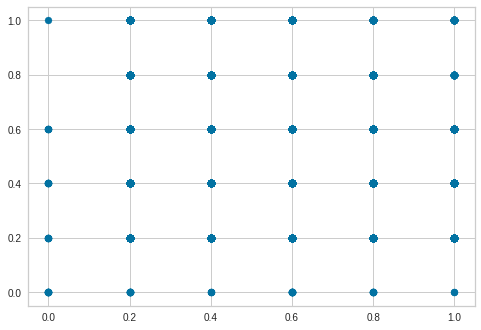

In [48]:
plt.scatter(x[:,0],x[:,1])

In [58]:
hcs = AgglomerativeClustering(linkage='single',n_clusters=3).fit(x)
hcs.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_hcs = hcs.fit_predict(x)

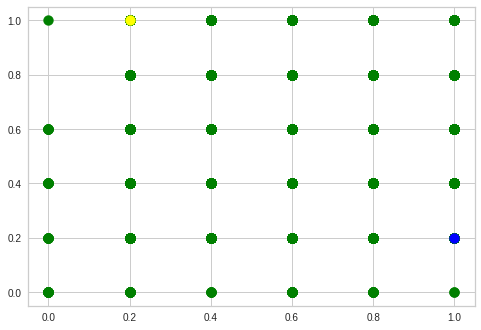

In [63]:
plt.scatter(x[y_hcs ==0,0],x[y_hcs==0,1],s=100,c='green', cmap='viridis')
plt.scatter(x[y_hcs ==1,0],x[y_hcs==1,1],s=100,c='blue',cmap='viridis')
plt.scatter(x[y_hcs ==2,0],x[y_hcs==2,1],s=100,c='yellow', cmap='viridis')
plt.scatter(x[y_hcs ==3,0],x[y_hcs==3,1],s=100,c='red', cmap='viridis')

**REFERENCES**

https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

https://www.kernel-operations.io/keops/_auto_tutorials/kmeans/plot_kmeans_torch.html

https://towardsdatascience.com/breaking-down-the-agglomerative-clustering-process-1c367f74c7c2

https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/